Матрица ошибок:
 [[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]
Точность модели: 1.0


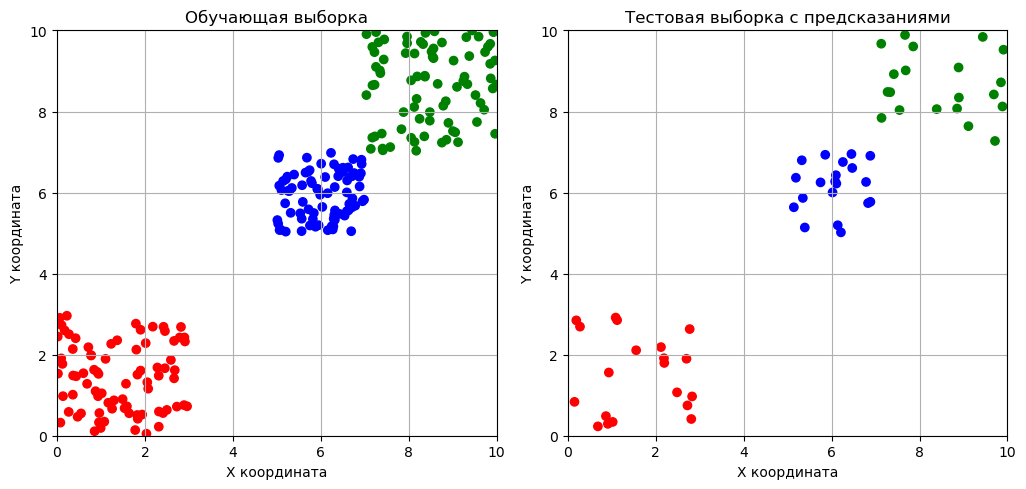

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Установка seed для воспроизводимости результатов
np.random.seed(42)

# Количество точек для каждого класса
n_points = 100

# Генерация данных для трех классов с помощью uniform
red_points = np.random.uniform(0, 3, (n_points, 2))  # Точно в диапазоне [0, 3]
blue_points = np.random.uniform(5, 7, (n_points, 2))  # Точно в диапазоне [5, 7]
green_points = np.random.uniform(7, 10, (n_points, 2))  # Точно в диапазоне [7, 10]

# Создание DataFrame для каждого класса
red_df = pd.DataFrame(red_points, columns=['x', 'y'])
red_df['color'] = 'red'

blue_df = pd.DataFrame(blue_points, columns=['x', 'y'])
blue_df['color'] = 'blue'

green_df = pd.DataFrame(green_points, columns=['x', 'y'])
green_df['color'] = 'green'

# Объединение всех данных
data = pd.concat([red_df, blue_df, green_df], ignore_index=True)

# Кодирование меток
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['color'])

# Разделение на признаки и целевую переменную
X = data[['x', 'y']]
y = data['label']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Матрица ошибок:\n', conf_matrix)
print('Точность модели:', accuracy)

# Визуализация
plt.figure(figsize=(15, 5))

# Обучающая выборка
plt.subplot(1, 3, 2)
colors_train = [data['color'].iloc[i] for i in y_train.index]
plt.scatter(X_train['x'], X_train['y'], c=colors_train)
plt.title('Обучающая выборка')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

# Тестовая выборка с предсказаниями
plt.subplot(1, 3, 3)
colors_pred = label_encoder.inverse_transform(y_pred)
plt.scatter(X_test['x'], X_test['y'], c=colors_pred)
plt.title('Тестовая выборка с предсказаниями')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()